# Principal Component Analysis

The Principal Component Analysis is a linear dimensionality reduction technique, that transforms a set of correlated variables into a smaller number of uncorrelated variables called principal components, while maintaining as much of the variance in the original dataset as possible.

In this project, we will look at how to implement the algorithm using the MNIST dataset, which contains images of handwritten digits with a high number of features (784).

### Import the required libraries and modules

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import KernelPCA, PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Import the data

In [47]:
# Load the MNIST dataset
mnist = fetch_openml(name='mnist_784', version=1)

# Separate the features and labels
X, y = mnist['data'], mnist['target']

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Inspect the data

In [48]:
print(X.shape)

(70000, 784)


When looking at the MNIST dataset, we can look at the shape to reveal the number of images (70,000) and the number of features (784). This high number of features could be a problem for any analysis, this is due to multicollinearity and the amount of computation needed to analyse such a large dataset. 

Therefore, we implement the PCA which helps to reduce the dimensions of the dataset.

### Implementing Principal Component Analysis 

In [49]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In our PCA, we first have create an instance of the class and specify the number of components. When selecting the number of components, we aim to select an amount in which increasing it yields little to no increase in the cumulative explained variance of the model.

After this, we then call the `fit()` method on our data, which then computes the components, also known as eigenvectors and their corresponding eigenvalues. The eigenvalues contain the amount of variance explained by the component, while the eigenvectors represent the direction of the maximum variance in the data. 

Then, our data is projected into the new lower-dimensional space by calling the `transform` method. 

#### Visualisation of the PCA components

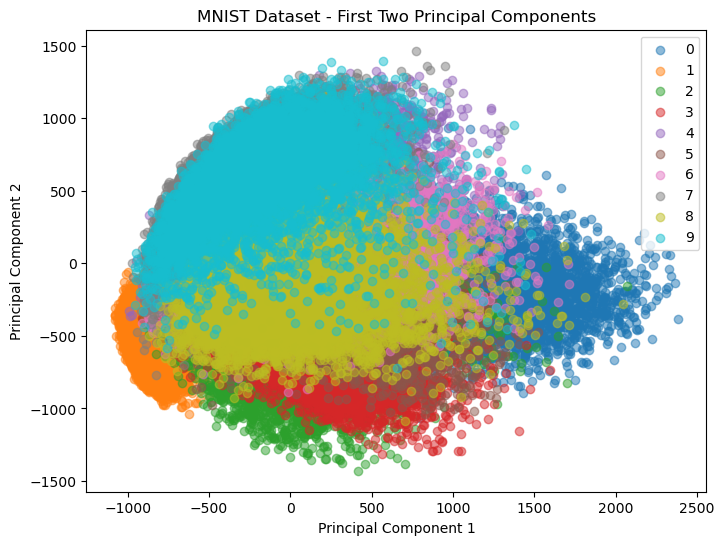

In [52]:
# Plot the first two principal components
plt.figure(figsize=(8, 6))
for digit in range(10):
    plt.scatter(X_pca[y == str(digit), 0], X_pca[y == str(digit), 1], label=str(digit), alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset - First Two Principal Components')
plt.legend()
plt.show()

When looking at the graph, we can see how distinct clusters have formed for each of the handwritten digits. It is worth noting that there is a significant amount of overlap in the model. This is because with just 2 components, we have a lot of unexplained variance that we cannot visualize if we were to increase the amount of components higher than 3.

#### Selecting the number of components

When selecting the number of components, it is usually done by plotting the cumulative explained variance against the number of components. When looking at the graph, we can use it to determine where the slope becomes shallower and hence the increase in explained variance becomes less significant.

We do this in the code below by running the PCA for a range of component numbers between 1 and 60 increasing by steps of 5. We then append the explained variance values to a list, which we can store and plot in our graph below.

In [61]:
# Perform PCA with different numbers of components
n_components_range = np.arange(1, 61, 5)  # Vary the number of components from 1 to 60 in steps of 1
explained_variances = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

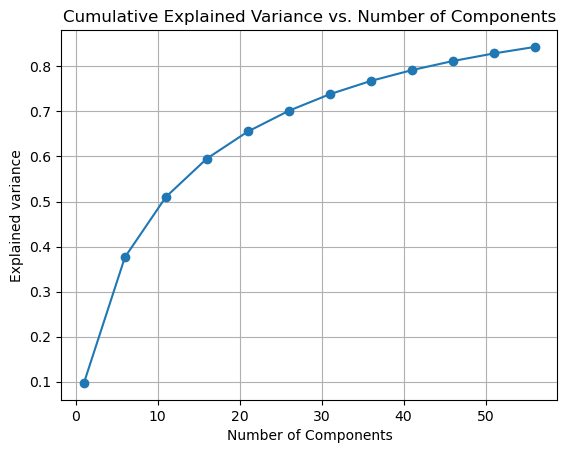

In [62]:
# Plot of the figure
plt.plot(n_components_range, explained_variances, marker='o')

# Labels and title
plt.xlabel("Number of Components")
plt.ylabel("Explained variance")
plt.title("Cumulative Explained Variance vs. Number of Components")

# Grid
plt.grid()

# Display command
plt.show()